Using Gaussian Blur:
Sigma X =  3  , Sigma Y =  5 and k =  3


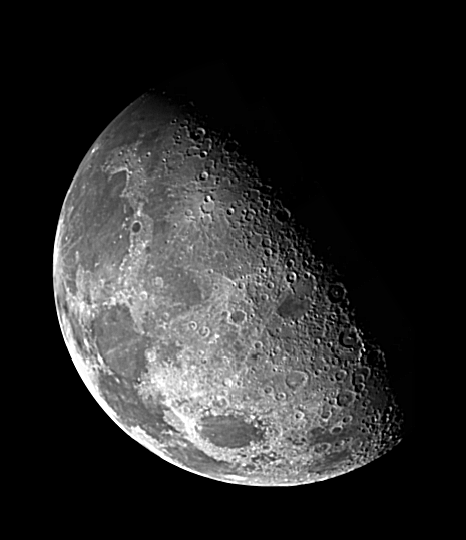

Sigma X =  3  , Sigma Y =  5 and k =  1


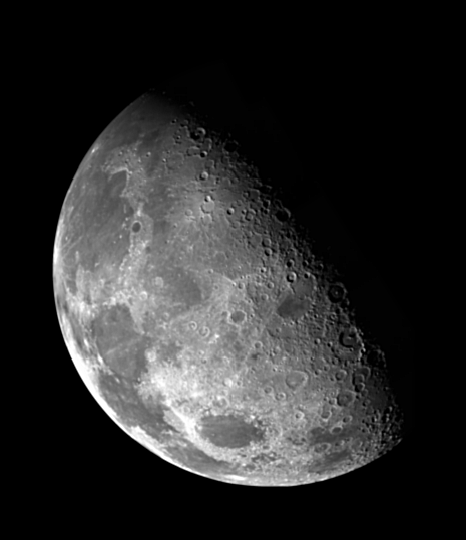

Sigma X =  7  , Sigma Y =  9 and k =  3


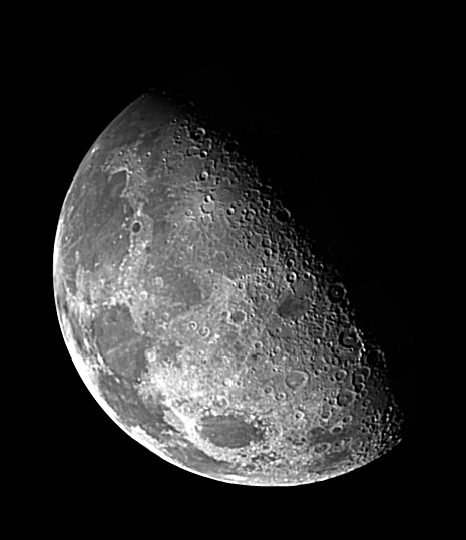

Sigma X =  7  , Sigma Y =  9 and k =  1


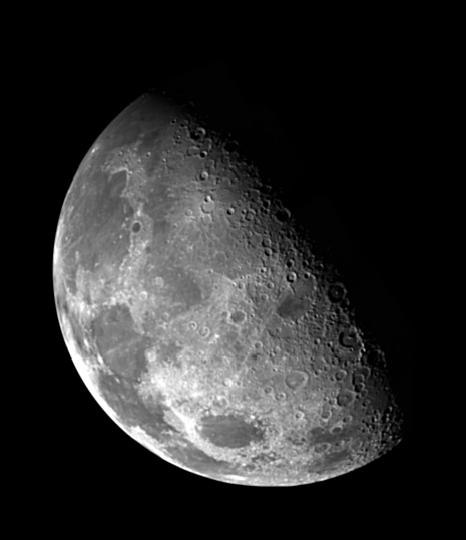

Using Median Blur:
Sigma =  3 and k =  3


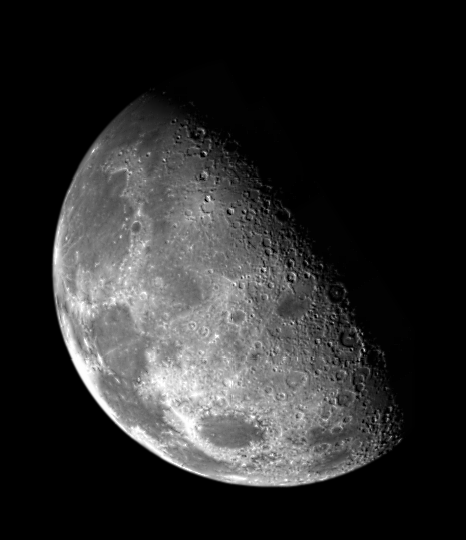

Sigma =  3 and k =  1


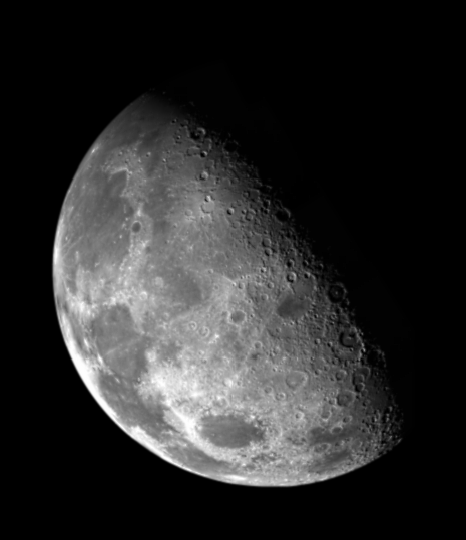

Sigma =  5 and k =  3


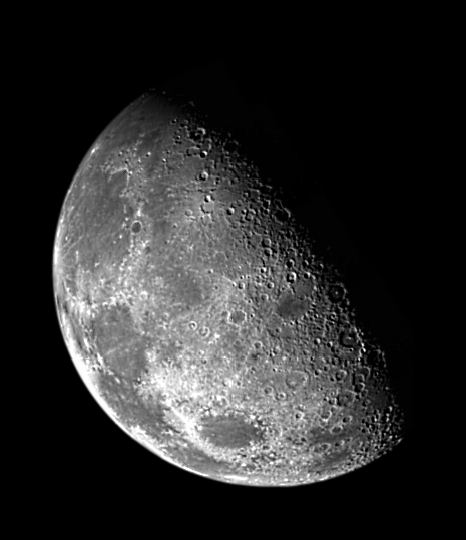

Sigma =  5 and k =  1


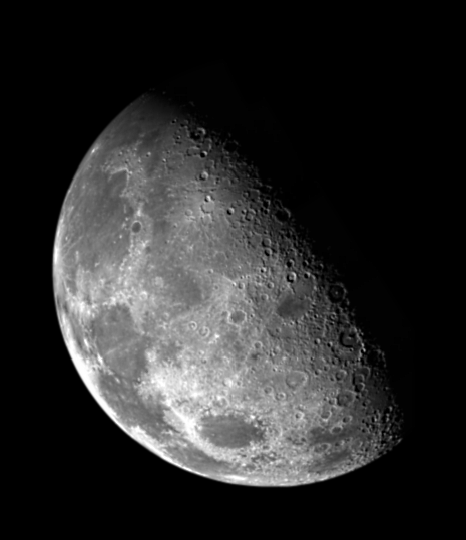

Using Box Filter:
k =  3


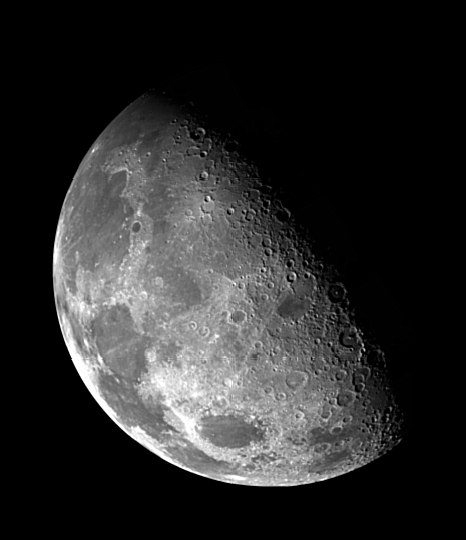

k =  1


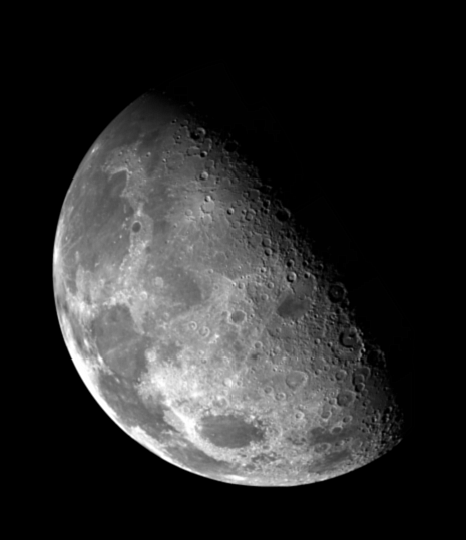

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

img = cv2.imread("moon.tif", 0)
height = img.shape[0]
width = img.shape[1]

mask = np.zeros([height,width])
unsharp = np.zeros([height,width])

#Gaussian Blur
blur = np.array([np.zeros([height,width]),np.zeros([height,width]),np.zeros([height,width])])
sigmaX = [3,7]
sigmaY = [5,9]
k = [3,1]
sig_index = 0
count = 0 
print("Using Gaussian Blur:")
while sig_index < 2:
  blur[sig_index] = cv2.GaussianBlur(img,(5,5),sigmaX[sig_index],sigmaY[sig_index])
  mask = img-blur[sig_index]
  count = 0
  while count < 2:
    unsharp = img+(k[count]*mask)
    print("Sigma X = ", sigmaX[sig_index], " , Sigma Y = ", sigmaY[sig_index], "and k = ", k[count])
    cv2_imshow(unsharp)
    count += 1
  sig_index += 1

#Median Blur
median = np.array([np.zeros([height,width]),np.zeros([height,width]),np.zeros([height,width])])
sigma = [3,5]
sig_index = 0

print("Using Median Blur:")
while sig_index < 2:
  median[sig_index] = cv2.medianBlur(img,sigma[sig_index])
  mask = img-median[sig_index]
  count = 0
  while count < 2:
    unsharp = img+(k[count]*mask)
    print("Sigma = ", sigma[sig_index], "and k = ", k[count])
    cv2_imshow(unsharp)
    count += 1
  sig_index += 1

#Box Filter
print("Using Box Filter:")
box = np.array([[1,1,1],[1,1,1],[1,1,1]])
output = np.zeros([height,width])
padded = np.pad(img, pad_width=1, mode='constant', constant_values=0)

for row in range(0,img.shape[0]):
  for col in range(0,img.shape[1]):
    for i in range(0,box.shape[0]):
      for j in range(0,box.shape[1]):
        output[row][col] += (box[i][j] * padded[row + i][col + j])/9
 

count = 0 
while count < 2:
  mask = img-output
  unsharp = img+(k[count]*mask)
  print("k = ", k[count])
  cv2_imshow(unsharp)
  count += 1

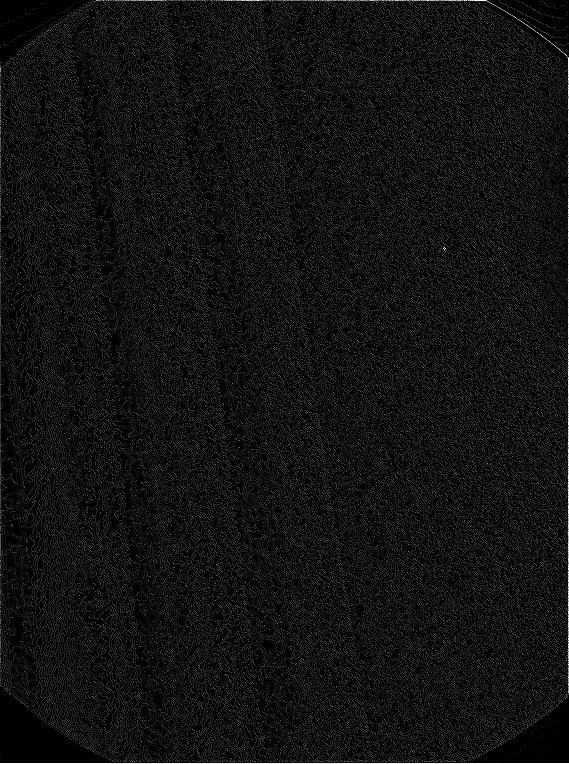

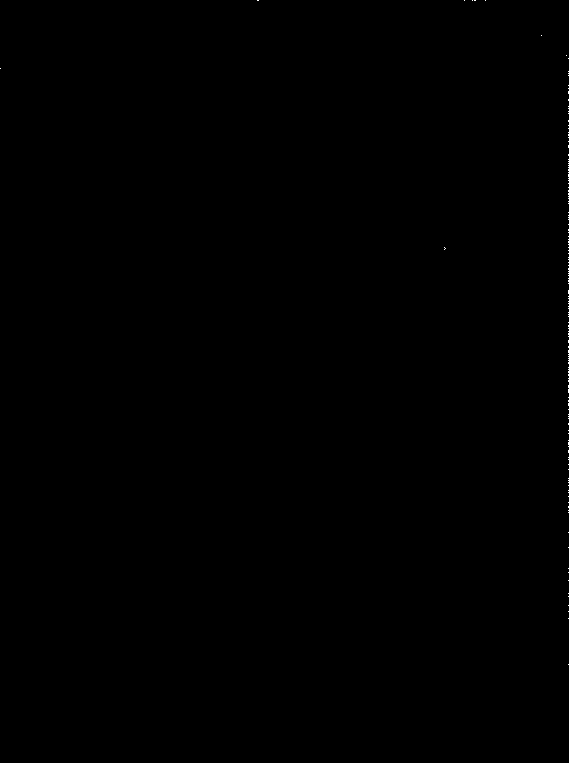

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread('blade.tif', 0)
height,width = img.shape

output = np.zeros([height,width])

kernel = np.array(([0,-1,0],[-1,4,-1],[0,-1,0]), dtype="int")

output = np.zeros([height,width])
padded = np.pad(img, pad_width=1, mode='constant', constant_values=0)

for row in range(0,img.shape[0]):
  for col in range(0,img.shape[1]):
    for i in range(0,box.shape[0]):
      for j in range(0,kernel.shape[1]):
        output[row][col] += (kernel[i][j] * padded[row + i][col + j])
 
cv2_imshow(output)
output = output/4
for i in range(height):
  for j in range(width):
    if output[i,j]>=65:
      output[i][j]=255
    else:
      output[i][j]=0

cv2_imshow(output)